In [1]:
# Adapted from : https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1


#import required libraries

import struct as st #This module performs conversions between Python values and C structs represented as Python bytes objects.
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Open the IDX file in readable binary mode.
filename = {'train_images' : './mnist_dataset/train-images.idx3-ubyte' ,'train_labels' : './mnist_dataset/train-labels.idx1-ubyte',
            'test_img':'./mnist_dataset/t10k-images.idx3-ubyte','test_lbl':'./mnist_dataset/t10k-labels.idx1-ubyte'}
train_imagesfile = open(filename['train_images'],'rb')
train_labelsfile = open(filename['train_labels'],'rb')
test_imagesfile = open(filename['test_img'],'rb')
test_labelsfile = open(filename['test_lbl'],'rb')


# Set pointer to the beginning of the file.
train_imagesfile.seek(0)
train_labelsfile.seek(0)
test_imagesfile.seek(0)
test_labelsfile.seek(0)

# Read the magic number
magic_img = st.unpack('>4B',train_imagesfile.read(4))
magic_lab = st.unpack('>4B',train_labelsfile.read(4))
magic_test_img = st.unpack('>4B',test_imagesfile.read(4))
magic_test_lab = st.unpack('>4B',test_labelsfile.read(4))


In [3]:

# Read the dimensions of the Image data-set
train_images = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
n_row_i = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
n_col_i = st.unpack('>I',train_imagesfile.read(4))[0] #num of column

test_images = st.unpack('>I',test_imagesfile.read(4))[0] #num of images
n_row_test = st.unpack('>I',test_imagesfile.read(4))[0] #num of rows
n_col_test = st.unpack('>I',test_imagesfile.read(4))[0] #num of column

# Read the dimensions of the Label data-set
train_labels = st.unpack('>I',train_labelsfile.read(4))[0] #num of items
test_labels = st.unpack('>I',test_labelsfile.read(4))[0] #num of items

# Reading the Image data
train_bytes_total = train_images*n_row_i*n_col_i*1 
test_bytes_total = test_images*n_row_test*n_col_test*1 

# 'B' is used since it is of 'unsigned char' C type and ‘integer’ Python type
# and has standard size 1 as mentioned in the official documentation of struct.
# ‘>’ is used since the data is in MSB first (high endian) format used by most 
# non-Intel processors, as mentioned in their original website.
train_img = 255 - np.asarray(st.unpack('>'+'B'*train_bytes_total,train_imagesfile.read(train_bytes_total))).reshape((train_images,n_row_i,n_col_i))
test_img =   255 - np.asarray(st.unpack('>'+'B'*test_bytes_total,test_imagesfile.read(test_bytes_total))).reshape((test_images,n_row_test,n_col_test))
 
# Reading the label data
train_lbl = np.asarray(st.unpack('>'+'B'*train_labels,train_labelsfile.read(train_labels))).reshape((train_labels))
test_lbl = np.asarray(st.unpack('>'+'B'*test_labels,test_labelsfile.read(test_labels))).reshape((test_labels))
print(train_img.shape)



(60000, 28, 28)


In [7]:
# Reshape to the expected CNN format 
train_img = train_img.reshape(train_img.shape[0], train_img.shape[1], train_img.shape[2], 1).astype('float32')
test_img = test_img.reshape(test_img.shape[0], test_img.shape[1], test_img.shape[2], 1).astype('float32')

print(test_img[132].shape)

(28, 28, 1)


5


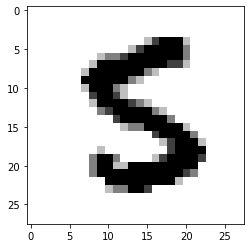

In [18]:
plt.imshow(test_img[132].reshape(28, 28), cmap='gray')
print(test_lbl[132])


In [19]:
# One hot encode images_array & test_img
train_img/=255
test_img/=255

# one hot encode
train_lbl = kr.utils.to_categorical(train_lbl, 10)
test_lbl = kr.utils.to_categorical(test_lbl, 10)


In [6]:
# Initialising the CNN
model = Sequential()
# Convolution layer
model.add(Conv2D(32,(3,3),input_shape = (train_img.shape[1],train_img.shape[2],1),activation = 'relu'))
# Pooling as reducing feature map
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())
# Full connection
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

# Compiling of the Model
model.compile( optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model

model.fit(train_img, train_lbl, validation_data=(test_img, test_lbl), epochs=10, batch_size=200)

# Evaluation of the model
metrics = model.evaluate(test_img, test_lbl, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 122s 2ms/sample - loss: 0.4191 - accuracy: 0.8899 - val_loss: 0.1501 - val_accuracy: 0.9557
Epoch 2/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.1300 - accuracy: 0.9621 - val_loss: 0.0951 - val_accuracy: 0.9711
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.0878 - accuracy: 0.9746 - val_loss: 0.0788 - val_accuracy: 0.9744
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.0669 - accuracy: 0.9810 - val_loss: 0.0628 - val_accuracy: 0.9800
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.0547 - accuracy: 0.9839 - val_loss: 0.0561 - val_accuracy: 0.9807
Epoch 6/10
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.0473 - accuracy: 0.9860 - val_loss: 0.0580 - val_accuracy: 0.9813
Epoch 7/10
60000/60000 [==========================

In [7]:
model.save('model.h5')





In [19]:
from tensorflow.keras.models import load_model

In [20]:
load_model = load_model('model.h5')

(1, 28, 28, 1)
[2]


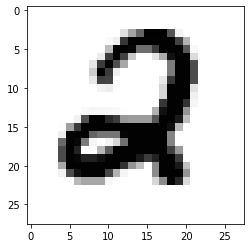

In [27]:
prd_img = load_model.predict_classes(test_img[147].reshape(-1,28,28,1))

plt.imshow(test_img[147].reshape(28, 28), cmap='gray')
print(test_img[147].reshape(-1,28,28,1).shape)
print(prd_img)